In [13]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [71]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

from qiskit_aer import Aer  # For local simulation
from qiskit_ibm_runtime import QiskitRuntimeService  # For IBM Quantum cloud access
from qiskit.compiler import transpile, assemble  # For circuit compilation
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2


In [4]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

In [5]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

In [6]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw()

┌───┐                                                               
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
     ├───┤ │                                                             
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
     ├───┤ │        │        │                                           
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) 
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
     └───┘                                                               
c: 3/════════════════════════════════════════════════════════════════════

In [7]:
qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

┌───┐                                                                ░ »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░─»
     ├───┤ │                                                              ░ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░─»
     ├───┤ │        │        │                                            ░ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░ »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░─»
     └───┘                                                                ░ »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌──────────┐ ░ ┌─┐      
«q_0: ┤0         ├─░─┤M├──────
«     │          │ ░ └╥┘┌─┐   
«q_1: ┤1 IQFT_dg ├─░──╫─┤M├───
«     │          │ ░  ║ └╥┘┌─┐
«q_2: ┤2         ├─░──╫──╫─┤M├
«     └──────────┘ ░  ║  ║ └╥┘
«q_3: ─────────────░──╫──╫──╫─
«                  ░  ║  ║  ║ 
«c: 3/════════════════╩══╩══╩═
«                     0  1  2

In [18]:
print(type(axs)) 

<class 'matplotlib.axes._axes.Axes'>


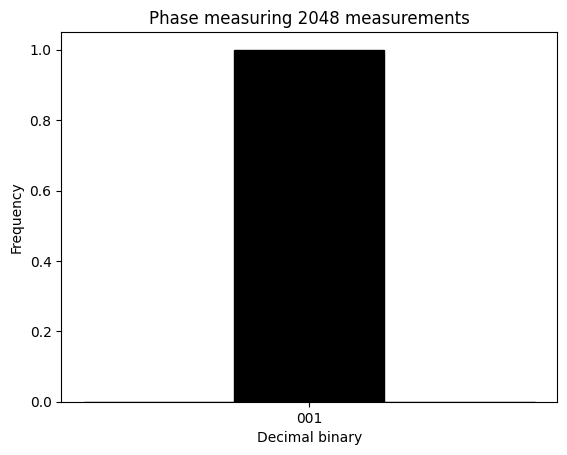

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

 
# Plotting a basic histogram
plt.hist(answer, bins=3, color='black', edgecolor='black')
# Adding labels and title
plt.xlabel('Decimal binary')
plt.ylabel('Frequency')
plt.title('Phase measuring 2048 measurements')
plt.savefig("squares.eps") 
# Display the plot
plt.show()

In [33]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«               ┌──────────┐┌─┐      
«q_0: ──────────┤0         ├┤M├──────
«               │          │└╥┘┌─┐   
«q_1: ──────────┤1 IQFT_dg ├─╫─┤M├───
«               │          │ ║ └╥┘┌─┐
«q_2: ─■────────┤2         ├─╫──╫─┤M├
«      │P(2π/3) └──────────┘ ║  ║ └╥┘
«q_3: ─■─────────────────────╫──╫──╫─
«                            ║  ║  ║ 
«c: 3/═══════════════════════╩══╩══╩═
«                            0  1  2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


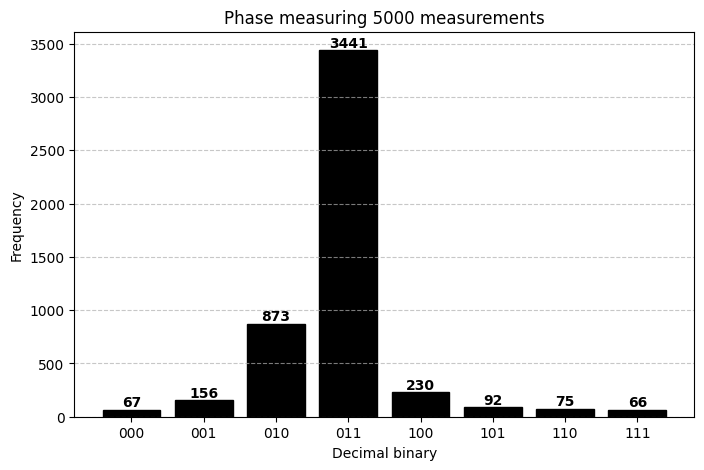

In [52]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

# Sort the keys in binary order
sorted_keys = sorted(answer.keys(), key=lambda x: int(x, 2))  # Sort by binary value

# Reorder counts based on sorted keys
sorted_values = [answer[key] for key in sorted_keys]

plt.figure(figsize=(8, 5))
bars = plt.bar(sorted_keys, sorted_values, color='black', edgecolor='black')

# Add count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # x position
             bar.get_height(),                 # y position (height of bar)
             str(bar.get_height()),            # Text (count value)
             ha='center', va='bottom',         # Center alignment
             fontsize=10, fontweight='bold')

plt.xlabel('Decimal binary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Phase measuring 5000 measurements')
plt.savefig("squares.eps") 
# Display the plot
plt.show()

In [53]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │         │         │         │         │         │        »
q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │         │         │         │         │         │        »
q_4: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_5: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 5/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ─■────────────────────────────────────────────────────────────────────»
«      │                                                                    »
«q_3: ─┼─────────■─────────■─────────■─────────■─────────■─────────■────────»
«      │         │         │         │         │         │         │        »
«q_4: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─■─────────■──────────────────────────────────────────────────────────»
«      │         │                                                          »
«q_4: ─┼─────────┼─────────■─────────■─────────■─────────■─────────■────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─────────────────────────────────

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


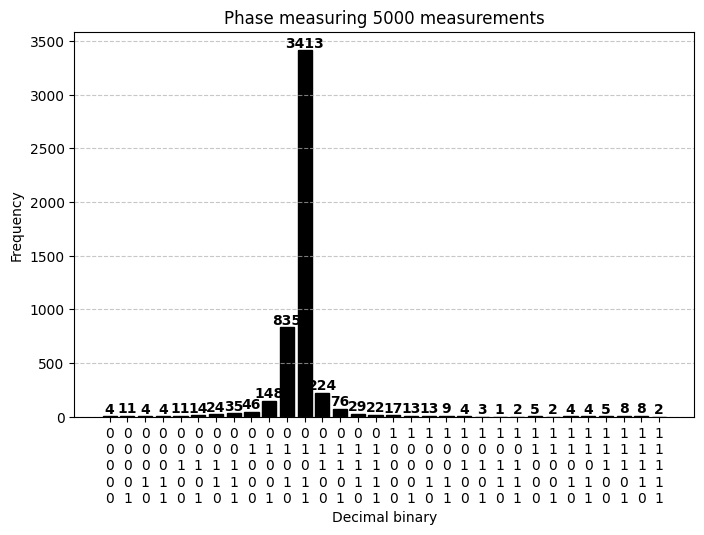

In [64]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

# Sort the keys in binary order
sorted_keys = sorted(answer.keys(), key=lambda x: int(x, 2))  # Sort by binary value

# Reorder counts based on sorted keys
sorted_values = [answer[key] for key in sorted_keys]
formatted_labels = ['\n'.join(list(key)) for key in sorted_keys]

plt.figure(figsize=(8, 5))
bars = plt.bar(sorted_keys, sorted_values, color='black', edgecolor='black')

# Add count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # x position
             bar.get_height(),                 # y position (height of bar)
             str(bar.get_height()),            # Text (count value)
             ha='center', va='bottom',         # Center alignment
             fontsize=10, fontweight='bold')

plt.xticks(ticks=range(len(sorted_keys)), labels=formatted_labels, fontsize=10)
plt.xlabel('Decimal binary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Phase measuring 5000 measurements')
plt.savefig("squares.eps", format='eps', transparent=False, bbox_inches='tight') 
# Display the plot
plt.show()